## 1. Готовим категории

In [2]:
import cv2
import os

data_path='categories'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))
label_dict

{'Happy': 0,
 'Sad': 1,
 'Fear': 2,
 'Surprise': 3,
 'Neutral': 4,
 'Angry': 5,
 'Disgust': 6}

## 2. Собираем данные по датасету

In [3]:
img_size=32
data=[]
target=[]

facedata = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(facedata)


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        faces = cascade.detectMultiScale(img)
        for (x,y,w,h) in faces:
            face_img=img[y:y+w,x:x+w]
            resized=cv2.resize(face_img,(32,32))
            normalized=resized/255.0
            gray=cv2.cvtColor(face_img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

In [4]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [5]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

np.save('./training/data',data)
np.save('./training/target',new_target)

In [42]:
new_target[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 3. Собираем CNN модельку и сохраняем

In [11]:
import numpy as np

data=np.load('./training/data.npy')
target=np.load('./training/target.npy')

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


noOfFilters=64
sizeOfFilter1=(3,3)
sizeOfFilter2=(3,3)
sizeOfPool=(2,2)
noOfNode=64



model=Sequential()
model.add((Conv2D(32, sizeOfFilter1, input_shape=data.shape[1:],activation='relu')))
model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))

model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(noOfNode, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Metal device set to: Apple M1


2022-03-12 05:10:47.821028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-12 05:10:47.821253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [14]:
checkpoint = ModelCheckpoint('./training/model-{epoch:03d}.model',monitor='val_loss',verbose=0)
history=model.fit(train_data,train_target, epochs=60,callbacks=[checkpoint],validation_split=0.2)

2022-03-12 05:10:52.828796: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-12 05:10:52.993289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60
239/239 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.2414

2022-03-12 05:10:57.536863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-12 05:10:58.239297: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./training/model-001.model/assets
239/239 [==============================] - 6s 19ms/step - loss: 0.4189 - accuracy: 0.2414 - val_loss: 0.3817 - val_accuracy: 0.2977
Epoch 2/60
239/239 [==============================] - 4s 16ms/step - loss: 0.3949 - accuracy: 0.2820 - val_loss: 0.3704 - val_accuracy: 0.3318
Epoch 3/60
239/239 [==============================] - 4s 16ms/step - loss: 0.3741 - accuracy: 0.3565 - val_loss: 0.3380 - val_accuracy: 0.4403
Epoch 4/60
239/239 [==============================] - 4s 15ms/step - loss: 0.3550 - accuracy: 0.4122 - val_loss: 0.3281 - val_accuracy: 0.4481
Epoch 5/60
239/239 [==============================] - 4s 16ms/step - loss: 0.3386 - accuracy: 0.4423 - val_loss: 0.3182 - val_accuracy: 0.4806
Epoch 6/60
239/239 [==============================] - 4s 17ms/step - loss: 0.3261 - accuracy: 0.4687 - val_loss: 0.3032 - val_accuracy: 0.4937
Epoch 7/60
239/239 [==============================] - 4s 16ms/step - loss: 0.3174 - 

Epoch 29/60
239/239 [==============================] - 4s 16ms/step - loss: 0.2198 - accuracy: 0.6548 - val_loss: 0.2504 - val_accuracy: 0.5996
Epoch 30/60
239/239 [==============================] - 4s 17ms/step - loss: 0.2183 - accuracy: 0.6531 - val_loss: 0.2487 - val_accuracy: 0.5991
Epoch 31/60
239/239 [==============================] - 4s 16ms/step - loss: 0.2137 - accuracy: 0.6590 - val_loss: 0.2482 - val_accuracy: 0.6022
Epoch 32/60
239/239 [==============================] - 4s 16ms/step - loss: 0.2117 - accuracy: 0.6666 - val_loss: 0.2508 - val_accuracy: 0.6053
Epoch 33/60
239/239 [==============================] - 4s 17ms/step - loss: 0.2096 - accuracy: 0.6700 - val_loss: 0.2504 - val_accuracy: 0.6080
Epoch 34/60
239/239 [==============================] - 4s 17ms/step - loss: 0.2079 - accuracy: 0.6780 - val_loss: 0.2522 - val_accuracy: 0.6043
Epoch 35/60
239/239 [==============================] - 4s 17ms/step - loss: 0.2053 - accuracy: 0.6824 - val_loss: 0.2465 - val_accuracy:

Epoch 57/60
239/239 [==============================] - 4s 17ms/step - loss: 0.1607 - accuracy: 0.7625 - val_loss: 0.2687 - val_accuracy: 0.6179
Epoch 58/60
239/239 [==============================] - 4s 17ms/step - loss: 0.1605 - accuracy: 0.7621 - val_loss: 0.2695 - val_accuracy: 0.6211
Epoch 59/60
239/239 [==============================] - 4s 17ms/step - loss: 0.1590 - accuracy: 0.7609 - val_loss: 0.2663 - val_accuracy: 0.6127
Epoch 60/60
239/239 [==============================] - 4s 16ms/step - loss: 0.1563 - accuracy: 0.7721 - val_loss: 0.2711 - val_accuracy: 0.6195


## 4. Загружаем модельку, прогоняем наши фототографии

In [15]:
from keras.models import load_model
import cv2
import numpy as np

In [24]:
labels_dict={0:'Happy',  1:'Sad', 2:'Fear', 3:'Surprise', 4:'Neutral', 5:'Angry', 6: 'Disgust'}

In [25]:
model = load_model('./training/model-060.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [26]:
import matplotlib.pyplot as plt

def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()
    

In [36]:
folder_path=os.path.join('input')
img_names=os.listdir(folder_path)
print(img_names)

['adasd.jpg', '1*HEoLBLidT2u4mhJ0oiDgig.png', 'angry-people-screaming-260nw-292800785.jpg.webp']


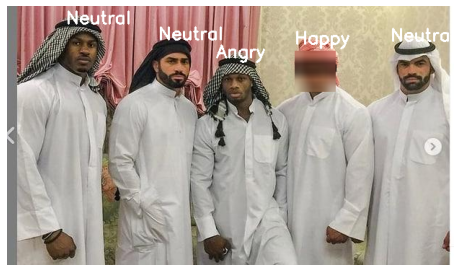

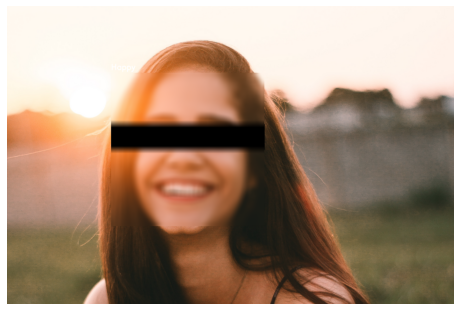

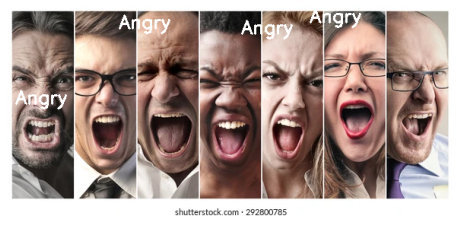

In [38]:
for image_path in img_names:
    image = cv2.imread(folder_path+'/'+image_path)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,3)  
    for (x,y,w,h) in faces:
            face_img=gray[y:y+w,x:x+w]
            resized=cv2.resize(face_img,(32,32))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(1,32,32,1))
            result=model.predict(reshaped)

            label=np.argmax(result,axis=1)[0]
            cv2.putText(image, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
            if label == 0:
                image_copy = image[y:y+h, x:x+w]
                eye_y1 = y+(h//3)
                eye_y2 = y+(h//2)
                cv2.rectangle(image,(x,eye_y1),(x+w,eye_y2),(0,0,0),-1)
#                 image_copy = cv2.GaussianBlur(image_copy, (23, 23), 50)
                image[y:y+image_copy.shape[0], x:x+image_copy.shape[1]] = image_copy
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plotImages(RGB_img)
    